# Q-Network Learning

In [91]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Load the environment

In [92]:
env = gym.make('FrozenLake-v0')

[2017-01-31 16:48:37,568] Making new env: FrozenLake-v0


## The Q-Network Approach

### Implementing the network itself

In [93]:
tf.reset_default_graph()

In [94]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

### Training the network

In [98]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,targetQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})

            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,_ = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                if rAll == 1.0:
                    strr = "Success"
                else:
                    strr = "Game over"
                print "Game %d played until step %d: %s, final reward=%s" % (i,j,strr,rAll)
                break
        jList.append(j)
        rList.append(rAll)
print "Percent of succesful episodes: " + str(100*sum(rList)/num_episodes) + "%"

Game 0 played until step 10: Game over, final reward=0.0
Game 1 played until step 4: Game over, final reward=0.0
Game 2 played until step 10: Game over, final reward=0.0
Game 3 played until step 3: Game over, final reward=0.0
Game 4 played until step 3: Game over, final reward=0.0
Game 5 played until step 7: Game over, final reward=0.0
Game 6 played until step 2: Game over, final reward=0.0
Game 7 played until step 11: Game over, final reward=0.0
Game 8 played until step 4: Game over, final reward=0.0
Game 9 played until step 5: Game over, final reward=0.0
Game 10 played until step 19: Game over, final reward=0.0
Game 11 played until step 7: Game over, final reward=0.0
Game 12 played until step 3: Game over, final reward=0.0
Game 13 played until step 2: Game over, final reward=0.0
Game 14 played until step 4: Game over, final reward=0.0
Game 15 played until step 12: Game over, final reward=0.0
Game 16 played until step 6: Game over, final reward=0.0
Game 17 played until step 12: Game o

### Some statistics on network performance

We can see that the network beings to consistly reach the goal around the 750 episode mark.

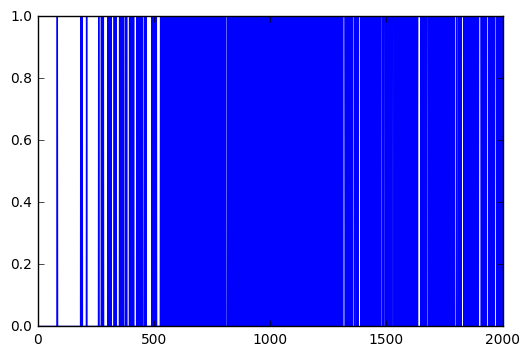

In [99]:
plt.plot(rList)

It also begins to progress through the environment for longer than chance aroudn the 750 mark as well.

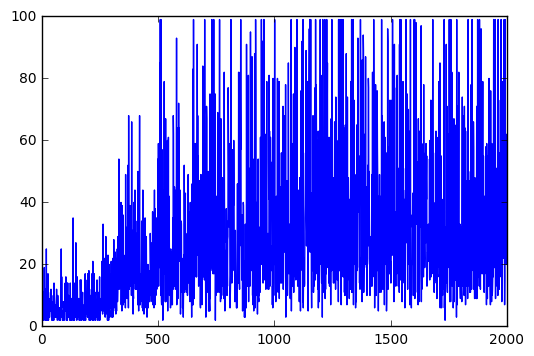

In [100]:
plt.plot(jList)